In [1]:
import uproot
import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### see https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf
###  0: charged hadrons
###  1: electrons      
###  2: muons          
###  3: neutral hadrons
###  4: photons    
###  5: residual
### -1: neutrinos

pdgid_class_dict = {
    -211:   0,  211:  0,  # pi+-
    -213:   0,  213:  0,  # rho+-
    -221:   0,  221:  0,  # eta+-
    -321:   0,  321:  0,  # kaon+-
    -323:   0,  323:  0,  # K*+-
    -411:   0,  411:  0,  # D+-
    -431:   0,  431:  0,  # D_s+-
    -433:   0,  433:  0,  # D_s*+-
    -521:   0,  521:  0,  # B+-
    -523:   0,  523:  0,  # B*+-
    -1114:  0, 1114:  0,  # delta+-
    -2114:  0, 2114:  0,  # delta0
    -2212:  0, 2212:  0,  # proton
    -3112:  0, 3112:  0,  # sigma-
    -3312:  0, 3312:  0,  # xi+-
    -3222:  0, 3222:  0,  # sigma+ 
    -3334:  0, 3334:  0,  # omega
    -11:    1,   11:  1,  # e
    -13:    2,   13:  2,  # mu
    -111:   3,  111:  3,  # pi0
                113:  3,  # rho0
                130:  3,  # K0L
                310:  3,  # K0S
    -311:   3,  311:  3,  # K0
    -313:   3,  313:  3,  # K*0
    -421:   3,  421:  3,  # D0
    -2112:  3, 2112:  3,  # neutrons
    -3122:  3, 3122:  3,  # lambda
    -3322:  3, 3322:  3,  # xi0
    22:     4,            # photon
    1000010020:  0,       # deuteron 
    1000010030:  0,       # triton
    1000010040:  0,       # alpha
    1000020030:  0,       # He3
    1000020040:  0,       # He4
    1000030040:  0,       # Li6
    1000030050:  0,       # Li7
    1000020060:  0,       # C6
    1000020070:  0,       # C7
    1000020080:  0,       # O8
    -999:   5,            # residual
    -12:   -1,   12: -1,  # nu_e
    -14:   -1,   14: -1,  # nu_mu
    -16:   -1,   16: -1,  # nu_tau
}

In [3]:
pixels_per_layer = [256,256,128,64,64,32]

In [17]:
# fpath = '/Users/ets/Downloads/singleQuarkJet_train.root'
# fpath = '/Users/ets/Downloads/val_skim.root'
# fpath = '/storage/agrp/nilotpal/COCOA/cocoa-hep/COCOA/run/e_gun_sup_res_27042024/val.root'
# fpath = '/storage/agrp/dreyet/PFlow/samples/singleParticle/Ntuples_photon_noID_newpflow_optData_18012024/merged_skim.root'
# fpath = '/storage/agrp/dreyet/PFlow/samples/singleParticle/Ntuples_K0long_noID_newpflow_optData_18012024/merged_skim.root'
# fpath = '/srv01/agrp/dreyet/cocoa-hep/COCOA/photons.root'
# fpath = '/srv01/agrp/dreyet/cocoa-hep/COCOA/cocoa_output_default.root'

# fpath = '/storage/agrp/dreyet/FullEventReco/HGPflow/temp/singlePhoton_20GeV_etaM2p5_output.root'

# fpath = '/srv01/agrp/dreyet/cocoa-hep/COCOA/buggy_photon.root'
fpath = '/storage/agrp/dmitrykl/cocoa/cocoa-hep/COCOA/buggy_photon_default.root'

# fpath = '/srv01/agrp/dreyet/cocoa-hep/COCOA/buggy_photon_low.root'; pixels_per_layer = [256,256,64,64,64,32]
# fpath = '/srv01/agrp/dreyet/cocoa-hep/COCOA/buggy_photon_high.root'; pixels_per_layer = [256,256,256,64,64,32]
# fpath = '/srv01/agrp/dreyet/cocoa-hep/COCOA/buggy_photon_default.root'
# fpath = '/srv01/agrp/dreyet/cocoa-hep/COCOA/buggy_photon_130.root'
# fpath = '/srv01/agrp/dreyet/cocoa-hep/COCOA/buggy_photon_default_noIron_interlayer.root'


data_dict = {}

with uproot.open(fpath) as f:
    tree = f['Low_Tree;1'] if 'Low_Tree;1' in f.keys() else f['Out_Tree']

    cell_variables = ['cell_eta', 'cell_phi', 'cell_x','cell_y','cell_z','cell_e','cell_layer','cell_parent_idx', 'cell_parent_list', 'cell_parent_energy']
    particle_variables = ['particle_pdgid','particle_pt','particle_eta','particle_phi', 'particle_e']

    for var in tqdm.tqdm(cell_variables + particle_variables):
        if var in tree.keys():
            data_dict[var] = tree[var].array(library='np')
        else:
            print('WARNING: skipping ', var)

100%|██████████| 15/15 [00:00<00:00, 461.22it/s]


In [38]:
cell_lead_parent_idx = []
cell_lead_parent_energy = []

for i in range(len(data_dict['cell_parent_list'])):
    cpl_ev = data_dict['cell_parent_list'][i]
    cpe_ev = data_dict['cell_parent_energy'][i]

    cell_lead_parent_idx_ev = []
    cell_lead_parent_energy_ev = []

    for cpl, cpe in zip(cpl_ev, cpe_ev):

        if len(cpl)>0:
            cell_lead_parent_idx_ev.append(int(cpl[0]))
            cell_lead_parent_energy_ev.append(cpe[0])
        else:
            cell_lead_parent_idx_ev.append(-1)
            cell_lead_parent_energy_ev.append(0)

    cell_lead_parent_idx.append(np.array(cell_lead_parent_idx_ev).astype(int))
    cell_lead_parent_energy.append(np.array(cell_lead_parent_energy_ev))

# data_dict['cell_lead_parent_idx'] = np.array(cell_lead_parent_idx, dtype=object)
# data_dict['cell_lead_parent_dep_energy'] = np.array(cell_lead_parent_energy, dtype=object)
data_dict['cell_lead_parent_idx'] = np.array(cell_lead_parent_idx)
data_dict['cell_lead_parent_dep_energy'] = np.array(cell_lead_parent_energy)

In [39]:
data_dict['particle_class'] = np.array([np.array([pdgid_class_dict.get(pdgid, 5) for pdgid in pdgids]).astype(int) for pdgids in data_dict['particle_pdgid']], dtype=object)

In [40]:

def event_display(ev_idx, data_dict, batch=False):

    fig, axs = plt.subplots(4,2, figsize=(10,18))

    fig.suptitle(f'Event {ev_idx}')

    ### cells
    c_c = data_dict['cell_parent_idx'][ev_idx]
    noise_mask = c_c == -1

    c_c = c_c[~noise_mask]
    c_x = data_dict['cell_eta'][ev_idx][~noise_mask]
    c_y = data_dict['cell_phi'][ev_idx][~noise_mask]
    c_l = data_dict['cell_layer'][ev_idx][~noise_mask]
    c_e = np.log(data_dict['cell_e'][ev_idx][~noise_mask] + 1)

    ### particles
    p_c = np.arange(len(data_dict['particle_pdgid'][ev_idx]))
    p_x = data_dict['particle_eta'][ev_idx]
    p_y = data_dict['particle_phi'][ev_idx]
    p_e = np.log(data_dict['particle_e'][ev_idx] + 1)

    axs[0,0].scatter(p_x, p_y, s=10*p_e, c=p_c, cmap='tab20', alpha=0.5, marker='x')
    axs[0,0].set_title('Particles')
    axs[0,0].set_xlabel('eta')
    axs[0,0].set_ylabel('phi')
    axs[0,0].set_xlim(-3,3)
    axs[0,0].set_ylim(-np.pi,np.pi)

    for i in range(6):

        mask = c_l == i
        axs[1+i%3,(i//3)].scatter(c_x[mask], c_y[mask], s=10*c_e[mask], c=c_c[mask], cmap='tab20', alpha=0.5)
        axs[1+i%3,(i//3)].set_title(f'Layer {i}')
        axs[1+i%3,(i//3)].set_xlabel('eta')
        axs[1+i%3,(i//3)].set_ylabel('phi')
        axs[1+i%3,(i//3)].set_xlim(-3,3)
        axs[1+i%3,(i//3)].set_ylim(-np.pi,np.pi)

    plt.tight_layout()
    if not batch:
        plt.show()
    plt.savefig(f'event_displays/ed_{ev_idx}.png')
    plt.close()


In [41]:
# ! mkdir -p event_displays

In [42]:
# for i in tqdm.tqdm(range(100)):
#     event_display(i, data_dict, batch=True)

In [69]:
def delta_R(eta1, phi1, eta2, phi2):
    eta1, phi1, eta2, phi2 = eta1.astype(np.float32), phi1.astype(np.float32), eta2.astype(np.float32), phi2.astype(np.float32)
    deta = eta1 - eta2
    dphi = phi1 - phi2
    dphi = np.where(np.abs(dphi) < np.pi, dphi, dphi - np.sign(dphi)*2*np.pi)
    return np.sqrt(deta**2 + dphi**2)

In [70]:
for eta, phi, peta, pphi, cphi in zip(data_dict['cell_eta'], data_dict['cell_phi'], cell_parent_eta, cell_parent_phi, data_dict['cell_lead_parent_idx']):
    print(eta.shape, phi.shape, peta.shape, pphi.shape, cphi.shape)
    break

(549,) (549,) (549,) (549,) (549,)


In [71]:
cell_parent_eta = np.array([np.where(cpi >= 0, peta[cpi], -9999) for peta, cpi in zip(data_dict['particle_eta'], data_dict['cell_lead_parent_idx'])], dtype=object)
cell_parent_phi = np.array([np.where(cpi >= 0, pphi[cpi], -9999) for pphi, cpi in zip(data_dict['particle_phi'], data_dict['cell_lead_parent_idx'])], dtype=object)
cell_parent_e = np.array([np.where(cpi >= 0, pe[cpi], -9999) for pe, cpi in zip(data_dict['particle_e'], data_dict['cell_lead_parent_idx'])], dtype=object)
cell_parent_class = np.array([np.where(cpi >= 0, pc[cpi], -9999) for pc, cpi in zip(data_dict['particle_class'], data_dict['cell_lead_parent_idx'])], dtype=object)

cell_parent_eta_flat = np.hstack(cell_parent_eta)
cell_parent_phi_flat = np.hstack(cell_parent_phi)
cell_parent_e_flat = np.hstack(cell_parent_e)
cell_parent_delta_R = np.array([np.where(cpi >= 0, delta_R(eta, phi, peta, pphi), -9999) for eta, phi, peta, pphi, cpi in zip(data_dict['cell_eta'], data_dict['cell_phi'], cell_parent_eta, cell_parent_phi, data_dict['cell_lead_parent_idx'])], dtype=object)
cell_parent_delta_R_flat = np.hstack(cell_parent_delta_R)
cell_parent_idx_flat = np.hstack(data_dict['cell_lead_parent_idx'])
cell_parent_dep_energy_flat = np.hstack(data_dict['cell_lead_parent_dep_energy'])
cell_parent_class_flat = np.hstack(cell_parent_class)

/tmp/ipykernel_3939873/521493617.py:27: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


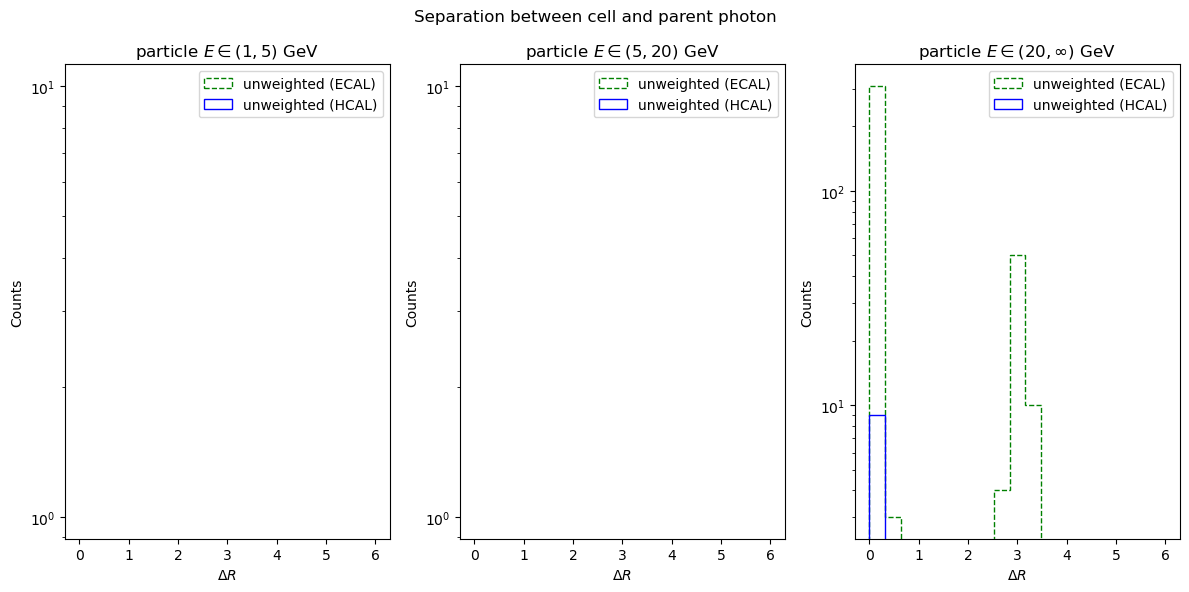

In [73]:
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1, 3)
# class_mask = cell_parent_class_flat == 3
class_mask = cell_parent_class_flat == 4

pt_bins = {
    'particle $E \in (1, 5)$ GeV': (1,5),
    'particle $E \in (5, 20)$ GeV': (5,20),
    'particle $E \in (20, \infty)$ GeV': (20,np.inf),
}

# fig.suptitle('Separation between cell and parent $K_0^L$')
fig.suptitle('Separation between cell and parent photon')

for i, (pt_bin_label, pt_bin) in enumerate(pt_bins.items()):

    ax = fig.add_subplot(gs[i])
    ax.set_title(pt_bin_label)
    bins = np.linspace(0,6,20)
    mask = np.logical_and(class_mask, np.logical_and(cell_parent_e_flat > pt_bin[0]*1000, cell_parent_e_flat < pt_bin[1]*1000))
    # ax.hist(cell_parent_delta_R_flat[mask][cell_parent_delta_R_flat[mask]>0], bins=bins, histtype='step', color='b', label='unweighted', density=False)
    # ax.hist(cell_parent_delta_R_flat[mask][cell_parent_delta_R_flat[mask]>0], weights=cell_parent_dep_energy_flat[mask][cell_parent_delta_R_flat[mask]>0], bins=bins, histtype='step', color='g', label='weighted by dep. E', density=True)
    ax.hist(cell_parent_delta_R_flat[mask][(cell_parent_delta_R_flat[mask]>0) & (np.hstack(data_dict['cell_layer'])[mask] < 3)], bins=bins, histtype='step', color='green', label='unweighted (ECAL)', density=False, linestyle='dashed')
    ax.hist(cell_parent_delta_R_flat[mask][(cell_parent_delta_R_flat[mask]>0) & (np.hstack(data_dict['cell_layer'])[mask] >=3)], bins=bins, histtype='step', color='blue', label='unweighted (HCAL)', density=False)
    ax.set_xlabel('$\Delta R$')
    ax.set_ylabel('Counts')
    ax.set_yscale('log')

    # if i==0:
    ax.legend(loc='upper right')

plt.tight_layout()

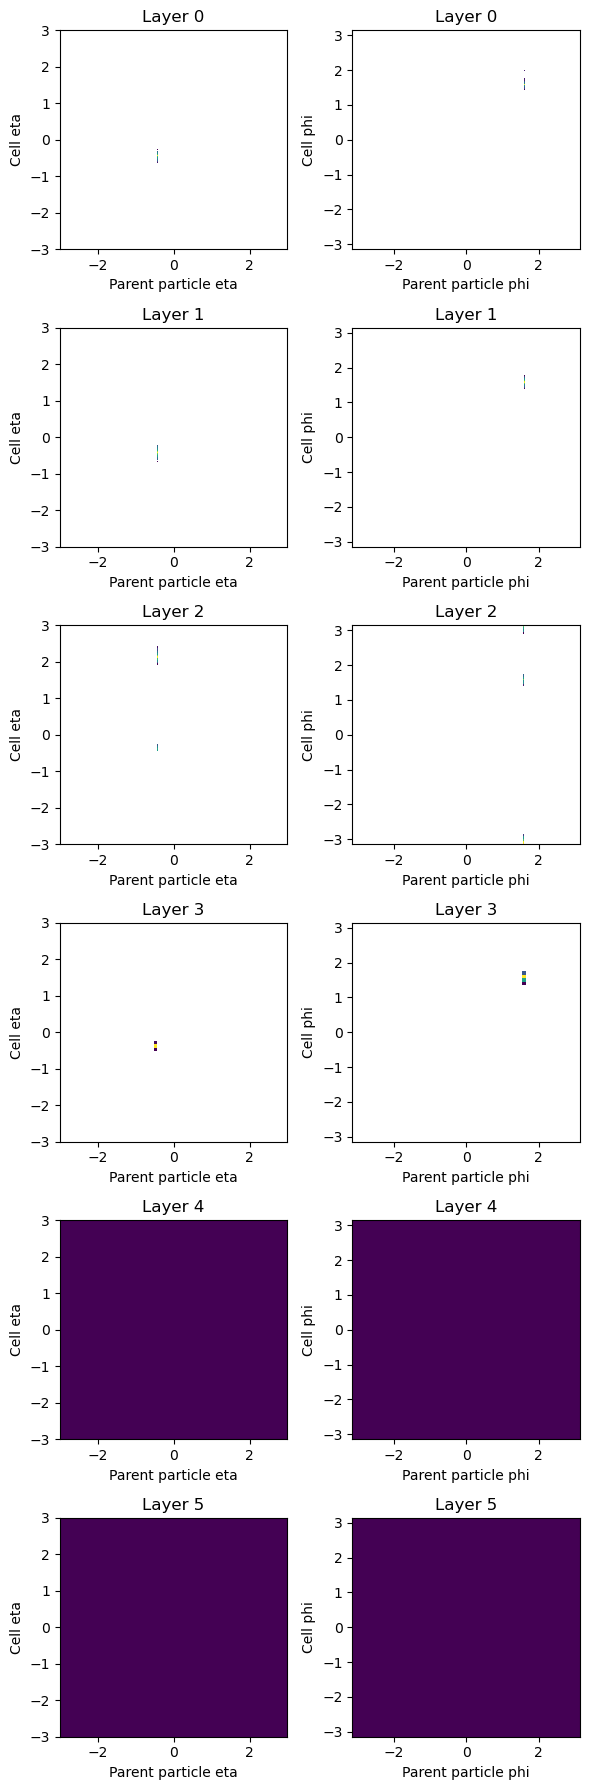

In [74]:
### scatter plot of particle eta vs cell eta and phi vs cell phi
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(6,2, figsize=(6,18))

# plt.suptitle('Scatter plot of parent $K_0^L$ eta vs cell eta and phi vs cell phi')
# plt.suptitle('Scatter plot of parent photon eta vs cell eta and phi vs cell phi')

for i in range(6):

    mask = np.hstack(data_dict['cell_layer']) == i

    ax[i,0].set_title(f'Layer {i}')
    eta_bins = np.linspace(-3,3,pixels_per_layer[i])
    # ax[i,0].hist2d(cell_parent_eta_flat[mask], np.hstack(data_dict['cell_eta'])[mask], bins=eta_bins, norm=LogNorm())
    ax[i,0].hist2d(cell_parent_eta_flat[mask], np.hstack(data_dict['cell_eta'])[mask], weights=np.hstack(data_dict['cell_e'])[mask], bins=eta_bins, norm=LogNorm())
    ax[i,0].set_ylabel('Cell eta')
    ax[i,0].set_xlabel('Parent particle eta')
    ax[i,0].set_xlim(-3,3)
    ax[i,0].set_ylim(-3,3)

    ax[i,1].set_title(f'Layer {i}')
    phi_bins = np.linspace(-np.pi,np.pi,pixels_per_layer[i])
    # ax[i,1].hist2d(cell_parent_phi_flat[mask], np.hstack(data_dict['cell_phi'])[mask], bins=phi_bins, norm=LogNorm())
    ax[i,1].hist2d(cell_parent_phi_flat[mask], np.hstack(data_dict['cell_phi'])[mask], weights=np.hstack(data_dict['cell_e'])[mask], bins=phi_bins, norm=LogNorm())
    ax[i,1].set_ylabel('Cell phi')
    ax[i,1].set_xlabel('Parent particle phi')
    ax[i,1].set_xlim(-np.pi,np.pi)
    ax[i,1].set_ylim(-np.pi,np.pi)

plt.tight_layout()
plt.show()

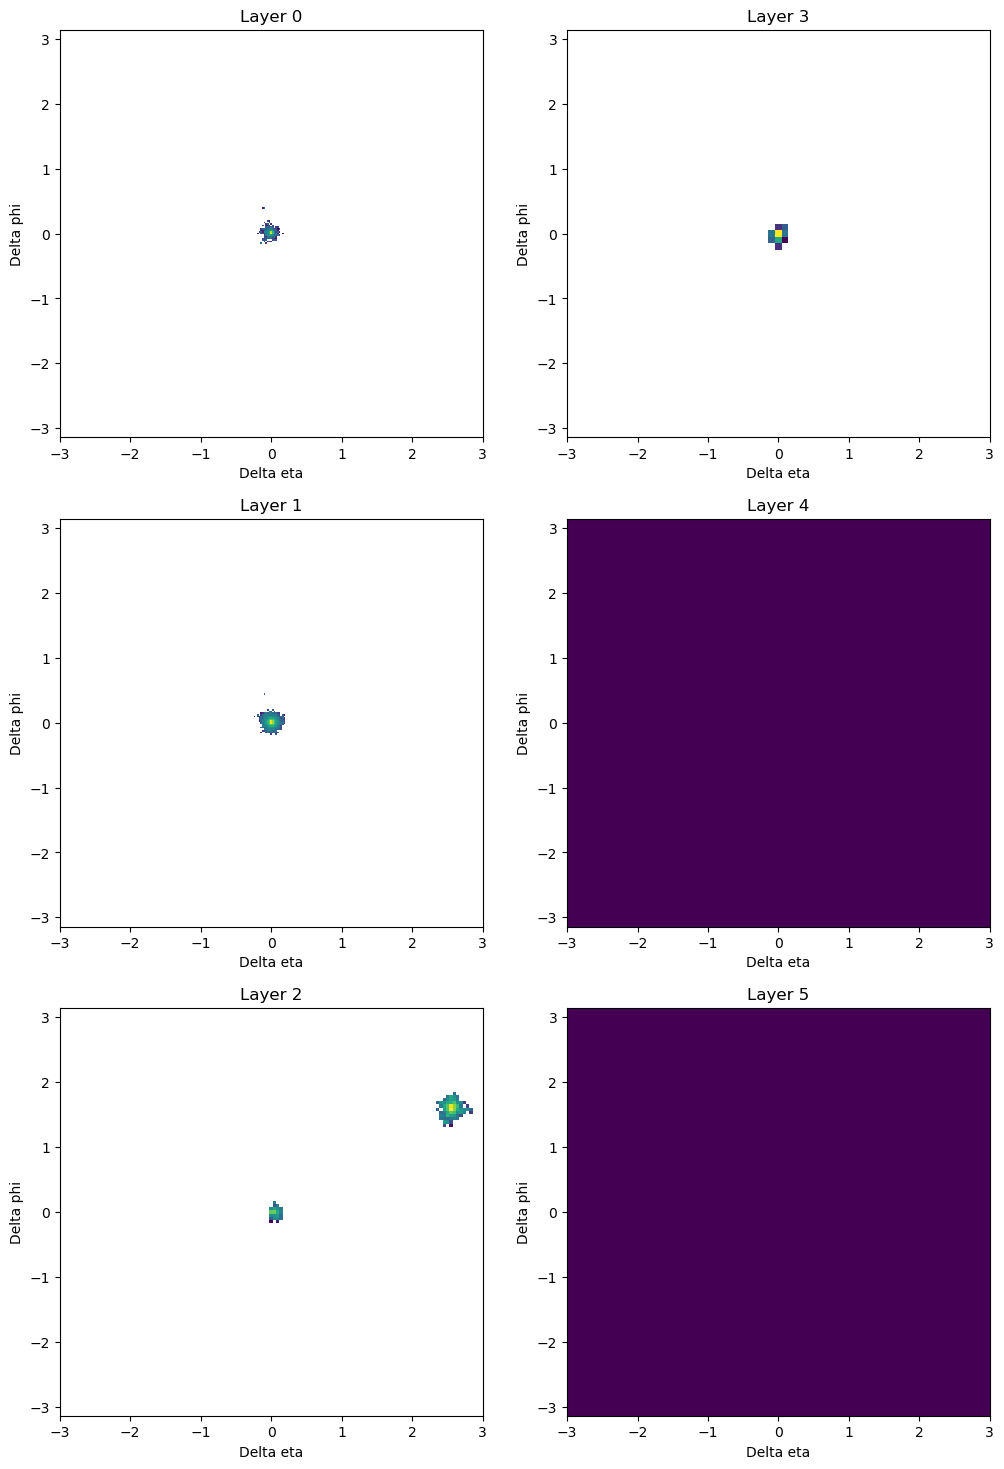

In [75]:
### delta eta versus delta phi for layer 2

from matplotlib.colors import LogNorm

fig = plt.figure(figsize=(12, 18))
gs = fig.add_gridspec(3, 2)

for l in range(6):
    mask = np.hstack(data_dict['cell_layer']) == l

    deta = np.hstack(data_dict['cell_eta'])[mask] - cell_parent_eta_flat[mask]
    dphi = np.hstack(data_dict['cell_phi'])[mask] - cell_parent_phi_flat[mask]
    dphi = np.where(np.abs(dphi) < np.pi, dphi, dphi - np.sign(dphi)*2*np.pi)

    ax = fig.add_subplot(gs[l%3,l//3])
    eta_bins = np.linspace(-3,3,pixels_per_layer[l])
    phi_bins = np.linspace(-np.pi,np.pi,pixels_per_layer[l])
    # ax.hist2d(deta, dphi, bins=(eta_bins,phi_bins), norm=LogNorm())
    ax.hist2d(deta, dphi, weights=cell_parent_dep_energy_flat[mask], bins=(eta_bins,phi_bins), norm=LogNorm())
    ax.set_title(f'Layer {l}')
    ax.set_ylabel('Delta phi')
    ax.set_xlabel('Delta eta')
    ax.set_xlim(-3,3)
    ax.set_ylim(-np.pi,np.pi)

plt.show()

## Find an example event

In [76]:
for ev in range(len(data_dict['cell_layer'])):
    mask = (data_dict['cell_layer'][ev] == 2) & (data_dict['cell_lead_parent_idx'][ev] >= 0)

    deta = data_dict['cell_eta'][ev][mask] - cell_parent_eta[ev][mask]
    dphi = data_dict['cell_phi'][ev][mask] - cell_parent_phi[ev][mask]
    dphi = np.where(np.abs(dphi) < np.pi, dphi, dphi - np.sign(dphi)*2*np.pi)

    if np.logical_and(np.abs(deta) > 1, np.abs(dphi) > 1).sum() > 0:
        print(ev, np.abs(deta), np.abs(dphi))

0 [0.01643836498260498 0.01643836498260498 0.01643836498260498
 0.01643836498260498 0.01643836498260498 0.03043663501739502
 0.03043663501739502 0.03043663501739502 0.03043663501739502
 0.03043663501739502 0.03043663501739502 0.07731163501739502
 0.07731163501739502 0.07731163501739502 0.07731163501739502
 0.07731163501739502 0.07731163501739502 0.12418663501739502
 0.12418663501739502 0.12418663501739502 0.12418663501739502
 2.374186635017395 2.374186635017395 2.421061635017395 2.421061635017395
 2.421061635017395 2.421061635017395 2.421061635017395 2.467936635017395
 2.467936635017395 2.467936635017395 2.467936635017395 2.467936635017395
 2.467936635017395 2.467936635017395 2.467936635017395 2.467936635017395
 2.514811635017395 2.514811635017395 2.514811635017395 2.514811635017395
 2.514811635017395 2.514811635017395 2.514811635017395 2.514811635017395
 2.514811635017395 2.561686635017395 2.561686635017395 2.561686635017395
 2.561686635017395 2.561686635017395 2.561686635017395 2.561

In [77]:
delta_R_thresh = 5
energy_thresh = 1000

for ev_idx in tqdm.tqdm(range(len(cell_parent_delta_R))):

    mask = (cell_parent_delta_R[ev_idx] > delta_R_thresh) & (data_dict['cell_lead_parent_idx'][ev_idx] >= 0) & (data_dict['cell_lead_parent_dep_energy'][ev_idx] > energy_thresh)
    if np.any(mask):
        print(f'Event {ev_idx} has cells with delta_R > {delta_R_thresh}, dep. energy = {data_dict["cell_lead_parent_dep_energy"][ev_idx][mask]} MeV')

100%|██████████| 1/1 [00:00<00:00, 1161.54it/s]


In [78]:
print(data_dict['particle_eta'][34], data_dict['particle_phi'][34])

IndexError: index 34 is out of bounds for axis 0 with size 1

In [79]:
print(data_dict['particle_eta'][1], data_dict['particle_phi'][1], data_dict['particle_e'][1])

IndexError: index 1 is out of bounds for axis 0 with size 1

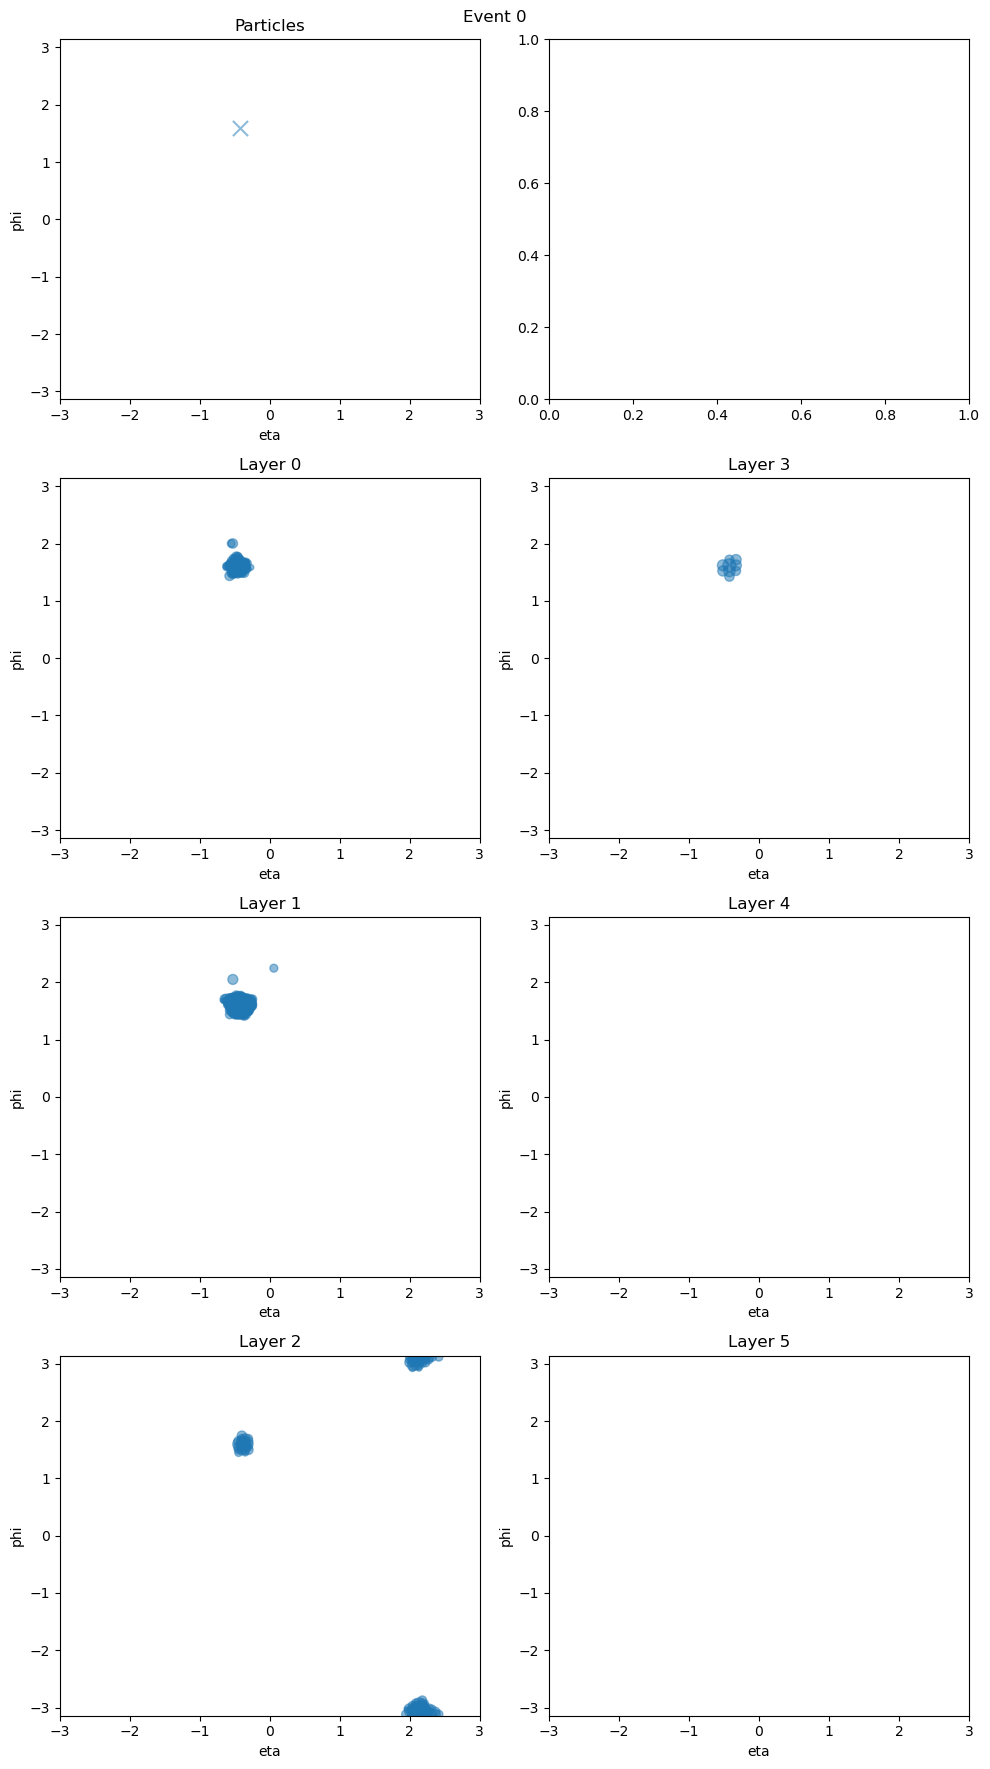

FileNotFoundError: [Errno 2] No such file or directory: '/storage/agrp/dmitrykl/cocoa/cocoa-hep/notebooks/event_displays/ed_0.png'

<Figure size 640x480 with 0 Axes>

In [82]:
event_display(0, data_dict)

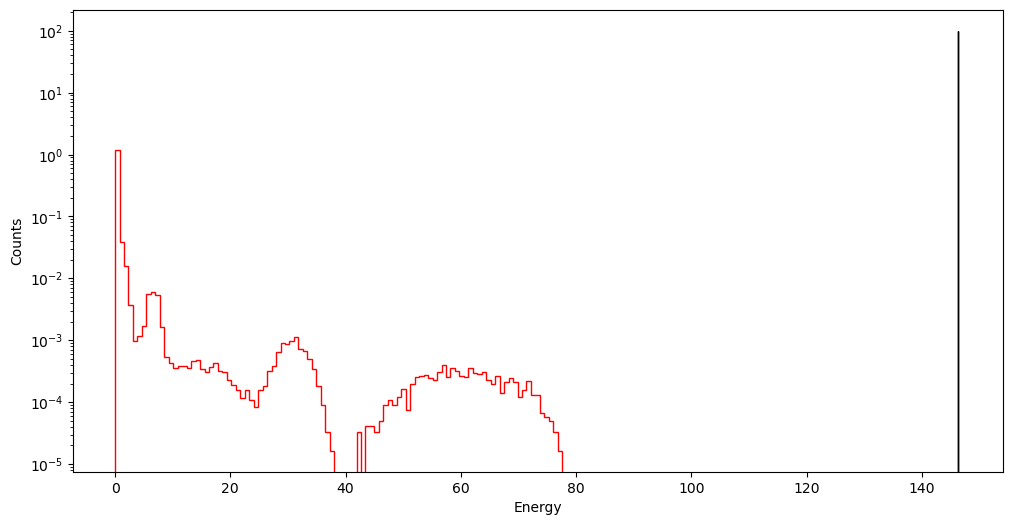

In [21]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.hist(np.hstack(data_dict['particle_e']/1000.), bins=100, histtype='step', color='k', label='Particles', density=True)
ax.hist(np.hstack(data_dict['cell_e']/1000.), bins=100, histtype='step', color='r', label='Cells', density=True)
ax.set_xlabel('Energy')
ax.set_ylabel('Counts')
ax.set_yscale('log')
plt.show()
